In [461]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
  
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

df = pd.concat([X, y], axis=1)
print("numbers:", len(df))
df.head(100)

numbers: 4177


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
95,M,0.665,0.535,0.195,1.6060,0.5755,0.3880,0.480,14
96,M,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
97,M,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8
98,M,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7


In [462]:
df['Rings'] = pd.to_numeric(df['Rings'])
# One-hot encode the 'Sex' column
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

for column in df.select_dtypes('number').columns:
    if df[column].mean() < 1.0:
        df[column] = df[column] * 10

print(df)

      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0       4.55      3.65    0.95         5.140           2.245           1.010   
1       3.50      2.65    0.90         2.255           0.995           0.485   
2       5.30      4.20    1.35         6.770           2.565           1.415   
3       4.40      3.65    1.25         5.160           2.155           1.140   
4       3.30      2.55    0.80         2.050           0.895           0.395   
...      ...       ...     ...           ...             ...             ...   
4172    5.65      4.50    1.65         8.870           3.700           2.390   
4173    5.90      4.40    1.35         9.660           4.390           2.145   
4174    6.00      4.75    2.05        11.760           5.255           2.875   
4175    6.25      4.85    1.50        10.945           5.310           2.610   
4176    7.10      5.55    1.95        19.485           9.455           3.765   

      Shell_weight  Rings  Sex_F  Sex_I

In [463]:
df['volume'] = (1/6) * np.pi * df['Length'] * df['Diameter'] * df['Height'] / 100
df = df.drop(columns=['Length','Diameter','Height'])

In [464]:
df['density'] = df['Whole_weight'] / (df['volume'] + 1)
df['shucked_weight_ratio'] = df['Shucked_weight'] / (df['Whole_weight'] + 1)
df['viscera_weight_ratio'] = df['Viscera_weight'] / (df['Whole_weight'] + 1)
df['shell_weight_ratio'] = df['Shell_weight'] / (df['Whole_weight'] + 1)

lower_bound = 0
upper_bound = 0.8
df = df[(df['shucked_weight_ratio'] >= lower_bound) & (df['shucked_weight_ratio'] <= upper_bound)]
df = df[(df['viscera_weight_ratio'] >= lower_bound) & (df['viscera_weight_ratio'] <= upper_bound)]
df = df[(df['shell_weight_ratio'] >= lower_bound) & (df['shell_weight_ratio'] <= upper_bound)]

df = df.drop(columns=['Whole_weight'])
df = df.drop(columns=['Shucked_weight'])
df = df.drop(columns=['Viscera_weight'])
df = df.drop(columns=['Shell_weight'])
print("numbers:", len(df))



numbers: 4172


Rings                      Axes(0.125,0.653529;0.227941x0.226471)
volume                  Axes(0.398529,0.653529;0.227941x0.226471)
density                 Axes(0.672059,0.653529;0.227941x0.226471)
shucked_weight_ratio       Axes(0.125,0.381765;0.227941x0.226471)
viscera_weight_ratio    Axes(0.398529,0.381765;0.227941x0.226471)
shell_weight_ratio      Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

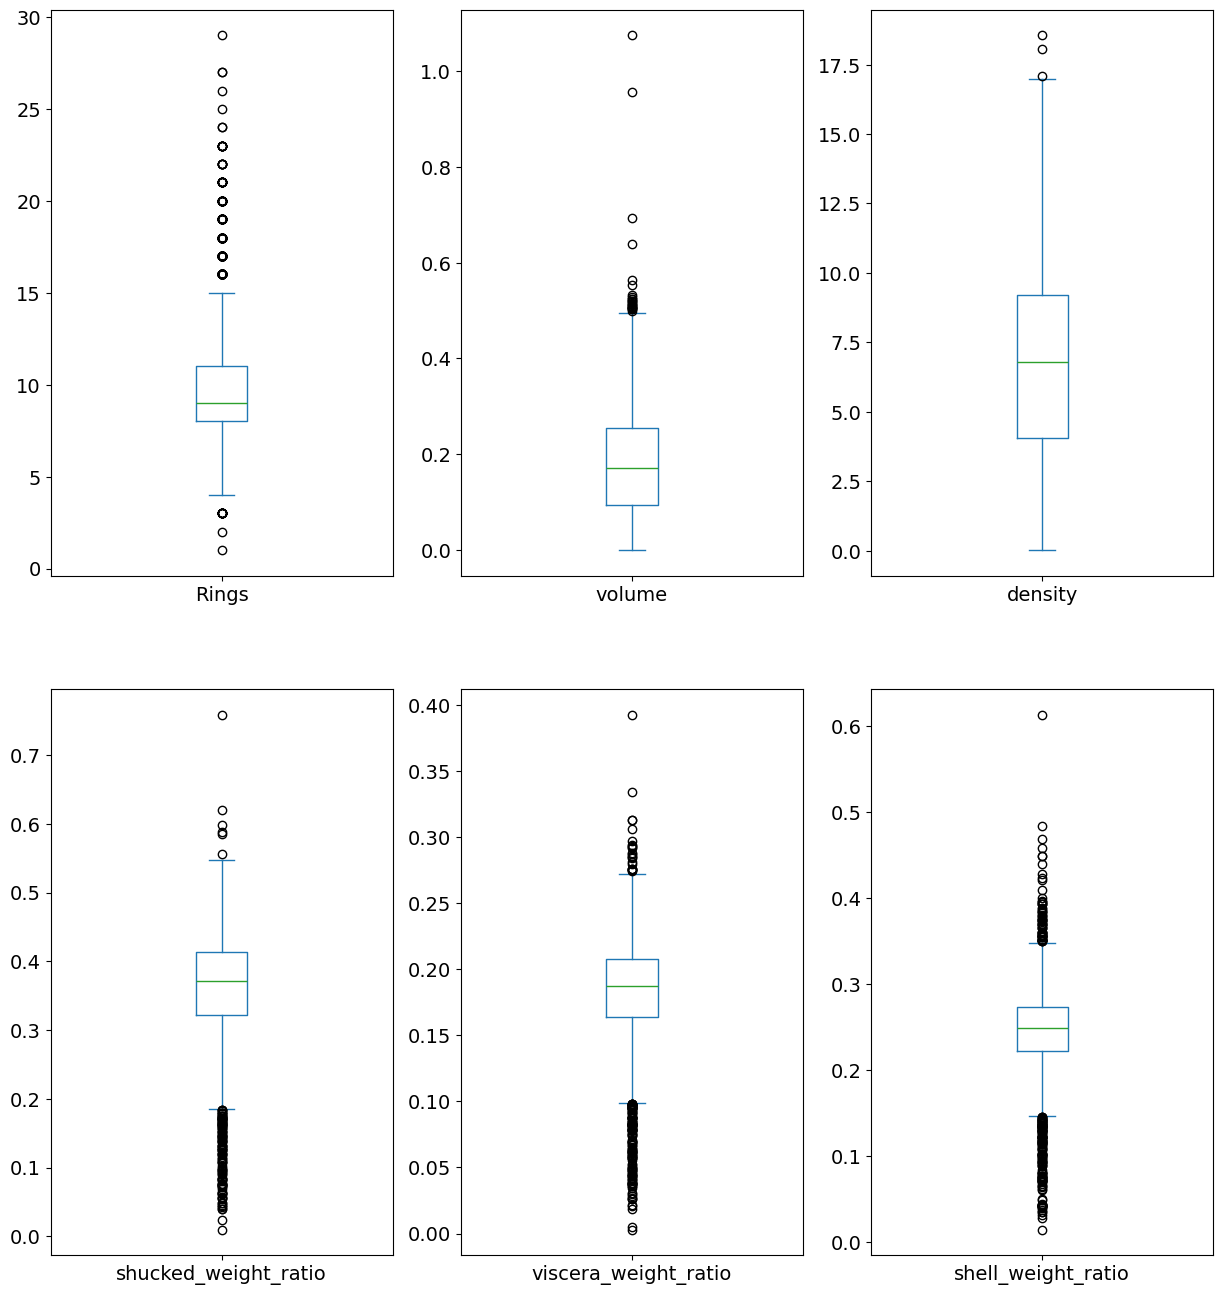

In [465]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(3,3), sharex=False, 
sharey=False, fontsize=14, figsize=(15,25))

In [466]:
from sklearn.preprocessing import MinMaxScaler

exclude_columns = ['Sex_F', 'Sex_I', 'Sex_M', 'Rings']

# Separate columns to scale and those to exclude
columns_to_scale = df.columns.difference(exclude_columns)
scaler = MinMaxScaler()

# Apply scaling only to selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head(10)
df.describe()

,Rings,volume,density,shucked_weight_ratio,viscera_weight_ratio,shell_weight_ratio
count,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000
mean,9.938399,0.169393,0.361249,0.470393,0.462579,0.386879
std,3.223073,0.103066,0.186704,0.102293,0.099969,0.082620
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.087504,0.217216,0.417140,0.413336,0.347284
50%,9.000000,0.160312,0.366189,0.483439,0.472230,0.390855
75%,11.000000,0.237964,0.496387,0.539744,0.525635,0.431968
max,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Rings                      Axes(0.125,0.653529;0.227941x0.226471)
volume                  Axes(0.398529,0.653529;0.227941x0.226471)
density                 Axes(0.672059,0.653529;0.227941x0.226471)
shucked_weight_ratio       Axes(0.125,0.381765;0.227941x0.226471)
viscera_weight_ratio    Axes(0.398529,0.381765;0.227941x0.226471)
shell_weight_ratio      Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

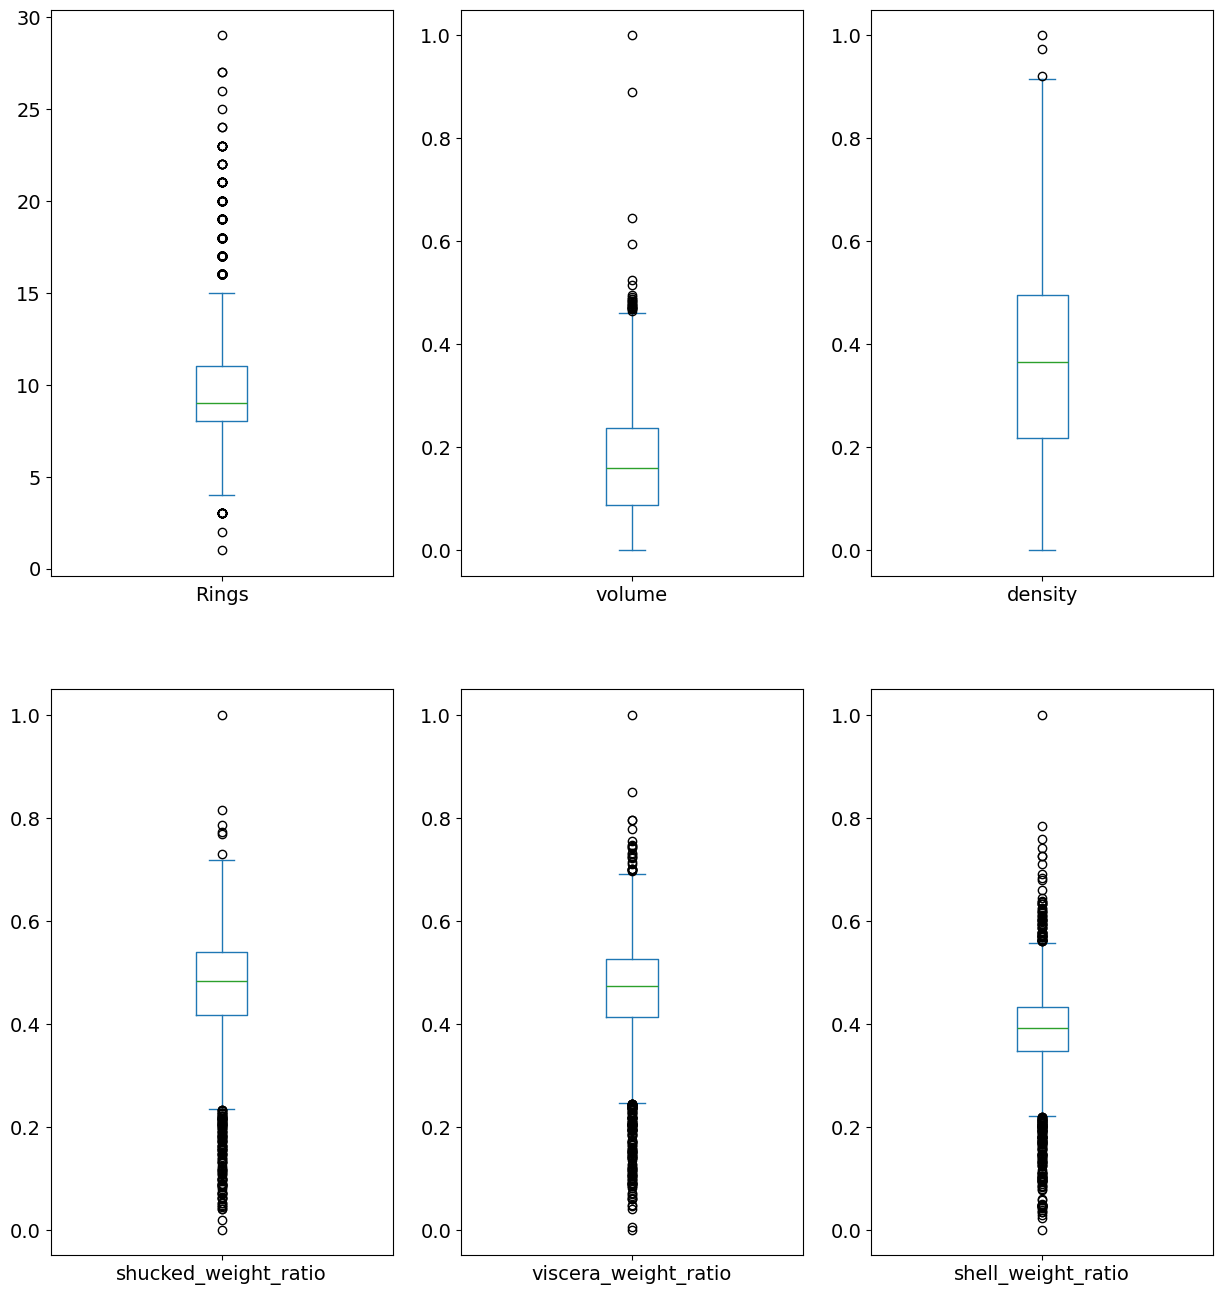

In [467]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(3,3), sharex=False, 
sharey=False, fontsize=14, figsize=(15,25))

<Axes: title={'center': 'Abalone Regression'}>

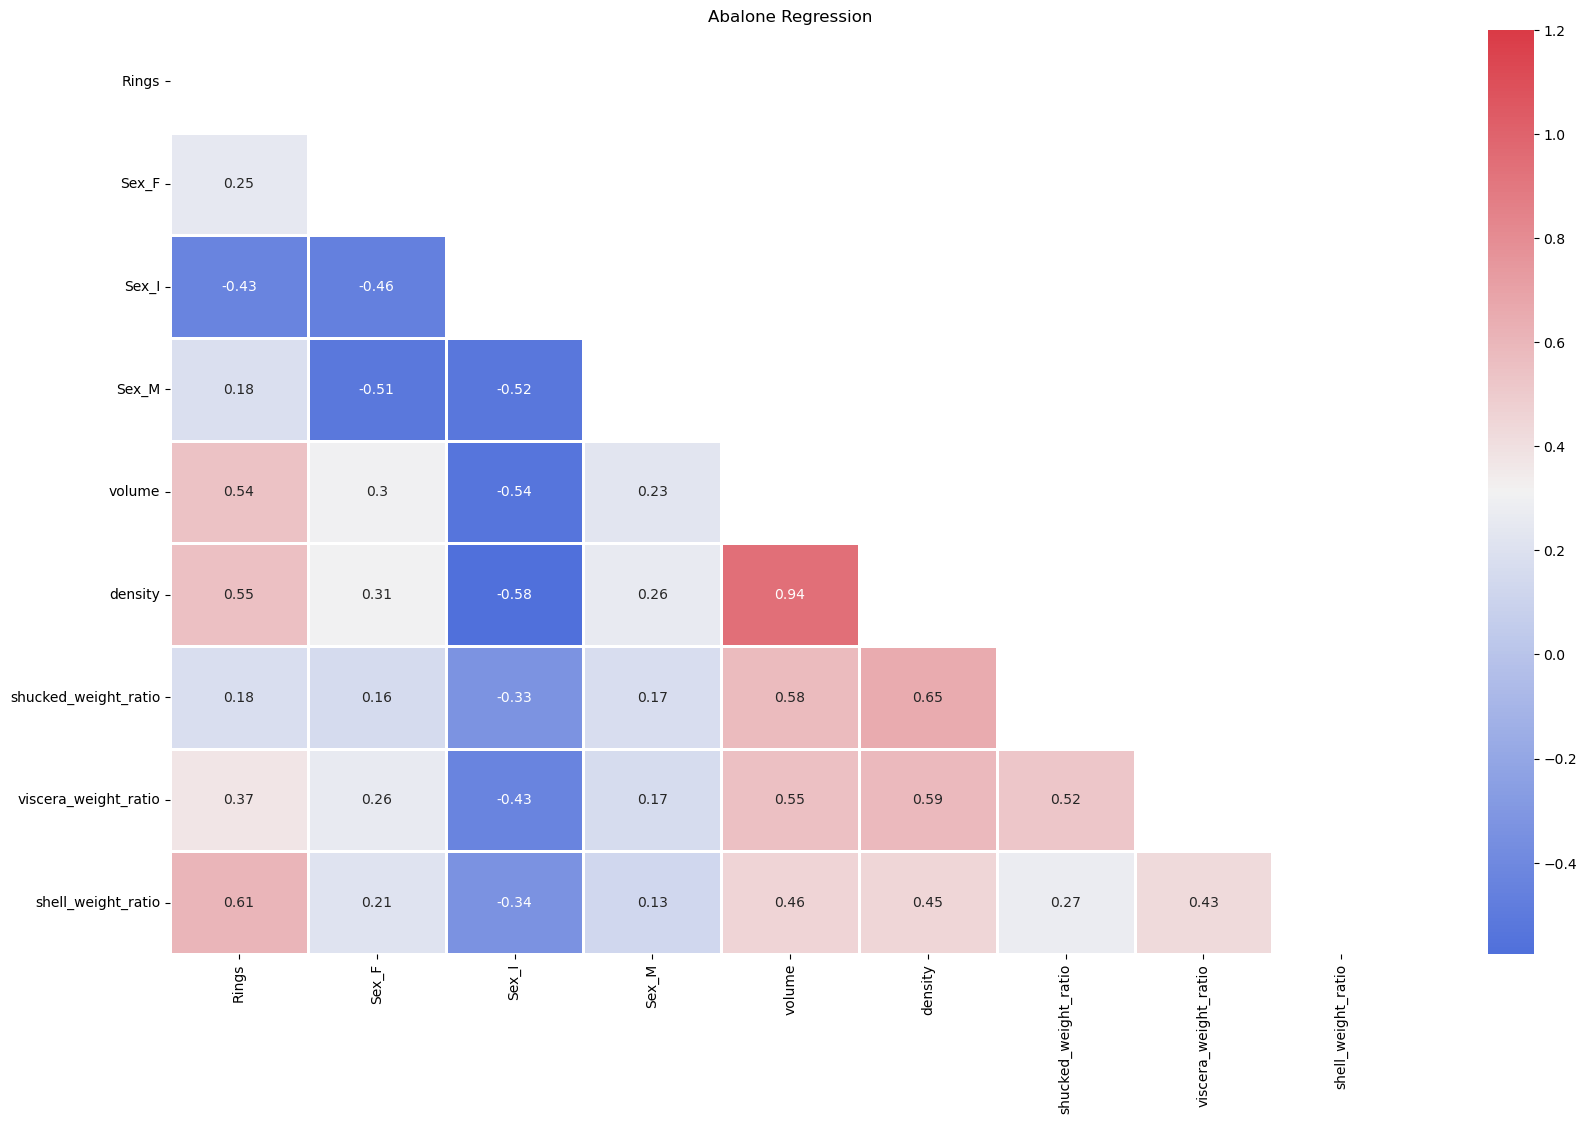

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatt = df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Abalone Regression')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1)

In [469]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

ys = y.values.ravel()

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(X_train, y_train)
    print("Accuracy:", model.score(X_test, y_test) * 100, "%")
    
    y_pred = model.predict(X)
    # calculate MSE
    mse = root_mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)

X, y = df.drop(columns=['Rings']), df['Rings'] 
model = LinearRegression()
classify(model, X, y)

# cross-validation
n_folds = 5
scores = cross_val_score(model, X, y, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

Accuracy: 54.66189134344353 %
Mean Squared Error: 2.2156547634817403
[0.40908595 0.23435651 0.52037496 0.53681655 0.42148951]
Average score and standard deviation: (42.4425 +- 4.82527)%
